In [ ]:
#Machine Learning Models for my IB Computer Science HL Extended Essay Research Project
#Analyzed how Natural Language Processing (NLP) can be used to detect fake news/clickbait content

!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!ls -a ~
print('-----------')
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!ls ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
.   .bashrc  .config   .jupyter  .keras		.local	.profile    .wget-hsts
..  .cache   .ipython  .kaggle	 .launchpadlib	.npm	.tmux.conf
-----------
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
kaggle.json


In [ ]:
!kaggle datasets download -d amananandrai/clickbait-dataset

  0% 0.00/743k [00:00<?, ?B/s]
100% 743k/743k [00:00<00:00, 90.6MB/s]


In [ ]:
!ls
!pwd

clickbait-dataset.zip  drive  kaggle.json  sample_data
/content


In [ ]:
!unzip clickbait-dataset.zip

Archive:  clickbait-dataset.zip
  inflating: clickbait_data.csv      


In [ ]:
pip install --upgrade tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print(tf.__version__)
print(tf.test.gpu_device_name())

tf.random.set_seed(42)
np.random.seed(42)

2.12.0



In [ ]:
pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00


**Data Vizualization**

In [ ]:
dataset=pd.read_csv("/content/clickbait_data.csv")
dataset_2=pd.read_csv("/content/clickbait_data.csv") #for hugging transformer
dataset.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [ ]:
data_clickbait=dataset[dataset['clickbait']==1].copy()
data_non_clickbait=dataset[dataset['clickbait']==0].copy()

import wordcloud
from wordcloud import WordCloud
def show_wordcloud(df, title):
  text = ' '.join(df['headline'].astype(str).tolist())
  stopwords = set(wordcloud.STOPWORDS)

  fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='plasma', width=800, height=600).generate(text)

  plt.figure(figsize=(10,7), frameon=True)
  plt.imshow(fig_wordcloud)
  plt.axis('off')
  plt.title(title, fontsize=20 )
  plt.show()

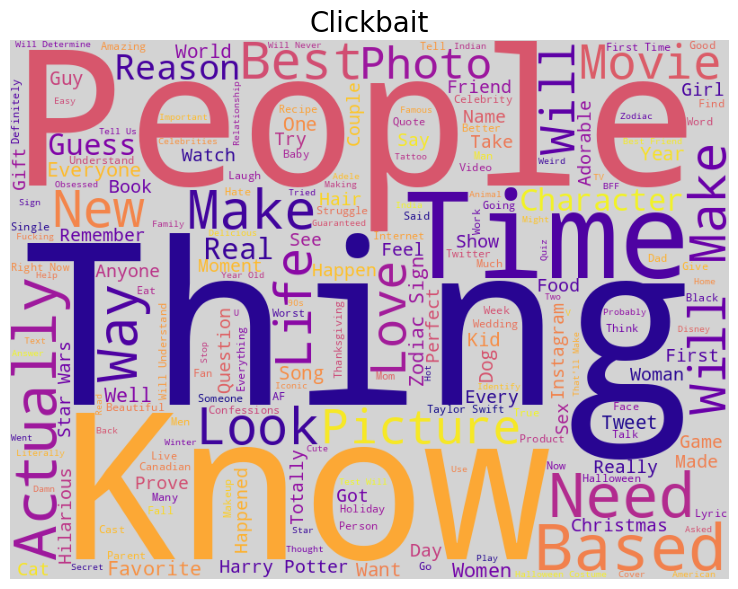

In [ ]:
show_wordcloud(data_clickbait, "Clickbait")

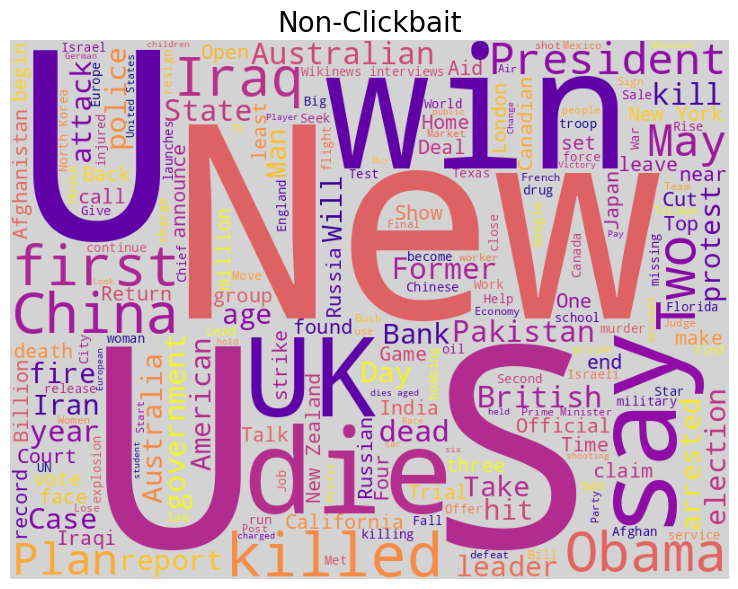

In [ ]:
show_wordcloud(data_non_clickbait, "Non-Clickbait")

In [ ]:
#history plot function
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#classification report
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

In [ ]:
#confusion matrix
def show_confusion_matrix(y_true, y_pred):
    '''
    |y_true| = |y_pred|
    '''
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    sns.heatmap(cm, annot = True, fmt = '.0f')
    plt.show()

**Preprocessing**

In [ ]:
#punctuation
import string
string.punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

dataset['headline']=dataset['headline'].apply(lambda x: remove_punctuation(x))
dataset_2['headline']=dataset_2['headline'].apply(lambda x: remove_punctuation(x))

In [ ]:
#lowercase
dataset['headline']=dataset['headline'].apply(lambda x: x.lower())
dataset_2['headline']=dataset_2['headline'].apply(lambda x: x.lower())

In [ ]:
#Tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

dataset['headline']=dataset['headline'].apply(lambda x: tokenization(x))

In [ ]:
#stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def remove_stopwords_2(text):
  output = [i for i in text if i not in stopwords]
  return " ".join(output)

dataset['headline']=dataset['headline'].apply(lambda x: remove_stopwords(x))
dataset_2['headline']=dataset_2['headline'].apply(lambda x: remove_stopwords_2(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Lemmatization
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

def lemmatizer_2(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return " ".join(lemm_text)

dataset['headline']=dataset['headline'].apply(lambda x: lemmatizer(x))
dataset_2['headline']=dataset_2['headline'].apply(lambda x: lemmatizer_2(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


**Data Initialization**

In [ ]:
X=dataset['headline'].values
Y=dataset['clickbait'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

X_train = [headline for sublist in X_train for headline in sublist]
X_train = np.array(X_train)
X_val = [headline for sublist in X_val for headline in sublist]
X_val = np.array(X_val)
X_test = [headline for sublist in X_test for headline in sublist]
X_test = np.array(X_test)

train_y = np.array(Y_train)

In [ ]:
VOCAB_SIZE=1000

encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

**Class Weights**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights_list = compute_class_weight( #function to compute class weight
    class_weight = 'balanced', #gives higher weights to classes with less frequency
    classes = np.unique(train_y),
    y = train_y
)
print(class_weights_list)

class_weights = {
    0: class_weights_list[0], #corresponding weights
    1: class_weights_list[1]
}
print(class_weights)

[0.99407824 1.00599273]
{0: 0.9940782448305989, 1: 1.0059927301306613}


**SimpleRNN Model**

In [ ]:
model_SRNN = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=24,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(24)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1)

])

# compile the model
model_SRNN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
model_SRNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 24)          24000     
                                                                 
 bidirectional (Bidirectiona  (None, 48)               2352      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1176      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 27,553
Trainable params: 27,553
Non-traina

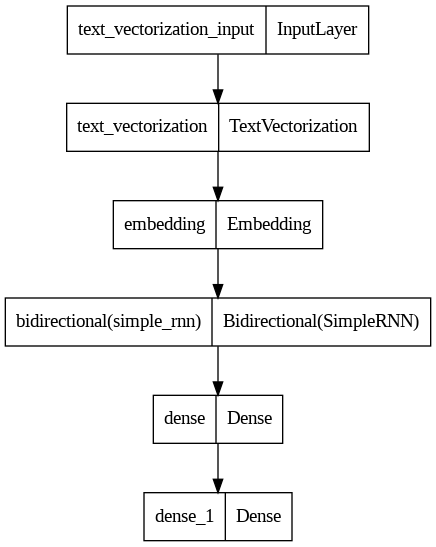

In [ ]:
tf.keras.utils.plot_model(model_SRNN)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.25,
    cooldown = 0,
    patience=2,
    verbose=1,
    min_lr=1e-7
)

# fit the model
model_SRNN_history=model_SRNN.fit(
    X_train,
    Y_train,
    epochs=5,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, reduce_lr],
    class_weight = class_weights
)

Epoch 1/10
640/640 [==============================] - 28s 33ms/step - loss: 0.2735 - accuracy: 0.9248 - val_loss: 0.2155 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 2/10
640/640 [==============================] - 15s 24ms/step - loss: 0.1785 - accuracy: 0.9670 - val_loss: 0.1874 - val_accuracy: 0.9590 - lr: 0.0010
Epoch 3/10
640/640 [==============================] - 12s 18ms/step - loss: 0.1729 - accuracy: 0.9734 - val_loss: 0.2652 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 4/10
638/640 [============================>.] - ETA: 0s - loss: 0.1594 - accuracy: 0.9766
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
640/640 [==============================] - 9s 14ms/step - loss: 0.1598 - accuracy: 0.9766 - val_loss: 0.3297 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 5/10
640/640 [==============================] - 12s 19ms/step - loss: 0.1297 - accuracy: 0.9827 - val_loss: 0.2711 - val_accuracy: 0.9627 - lr: 2.5000e-04


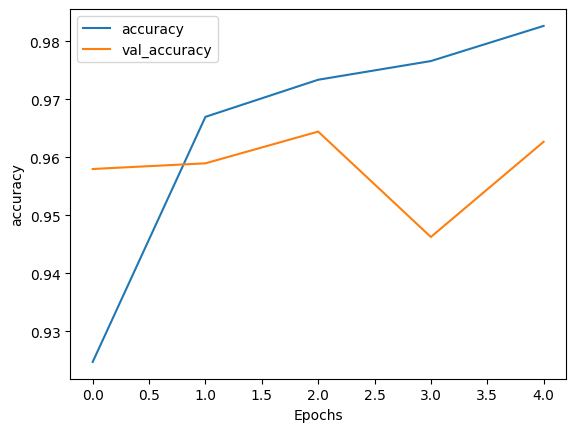

In [ ]:
plot_graphs(model_SRNN_history, 'accuracy')


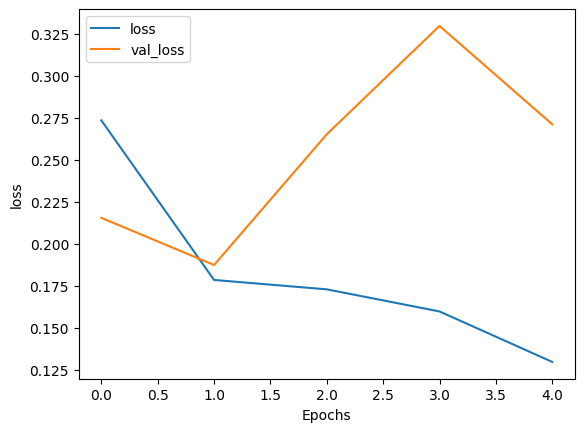

In [ ]:
plot_graphs(model_SRNN_history, 'loss')

In [ ]:
preds = (model_SRNN.predict(X_test) > 0).astype("int32")

200/200 [==============================] - 1s 4ms/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3127
           1       0.91      0.99      0.95      3273

    accuracy                           0.94      6400
   macro avg       0.95      0.94      0.94      6400
weighted avg       0.95      0.94      0.94      6400

Accuracy : 0.94296875


0.94296875

[[2811  316]
 [  49 3224]]


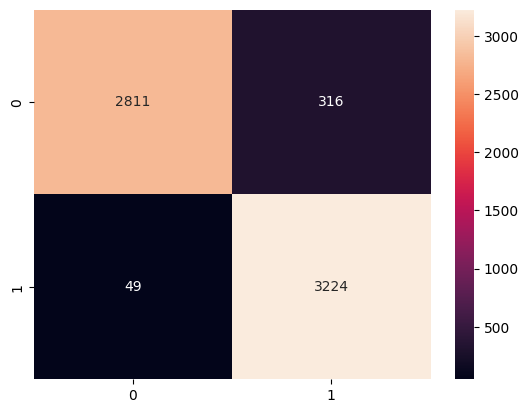

In [ ]:
show_confusion_matrix(Y_test, preds)

In [ ]:
model_SRNN.save("/content/drive/MyDrive/model_SRNN_finalclickbaitchecker")

**LSTM Model**

In [ ]:
model_LSTM = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=24,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1)

])

# compile the model
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 24)          24000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 48)               9408      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 34,609
Trainable params: 34,609
Non-trai

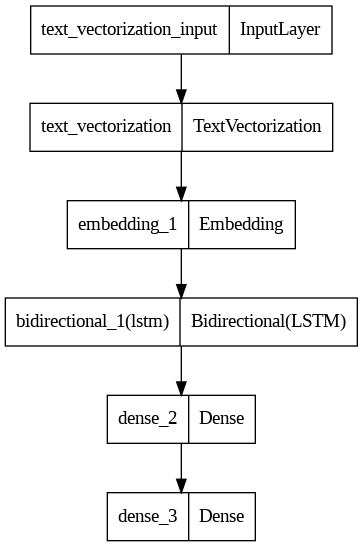

In [ ]:
tf.keras.utils.plot_model(model_LSTM)

In [ ]:
# fit the model
model_LSTM_history=model_LSTM.fit(
    X_train,
    Y_train,
    epochs=10,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, reduce_lr],
    class_weight = class_weights
)

Epoch 1/10
640/640 [==============================] - 35s 39ms/step - loss: 0.3173 - accuracy: 0.9138 - val_loss: 0.1630 - val_accuracy: 0.9574 - lr: 0.0010
Epoch 2/10
640/640 [==============================] - 16s 25ms/step - loss: 0.1974 - accuracy: 0.9656 - val_loss: 0.2163 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 3/10
639/640 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9689
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
640/640 [==============================] - 16s 25ms/step - loss: 0.1918 - accuracy: 0.9689 - val_loss: 0.1636 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 4/10
640/640 [==============================] - 20s 32ms/step - loss: 0.1398 - accuracy: 0.9734 - val_loss: 0.1938 - val_accuracy: 0.9611 - lr: 2.5000e-04


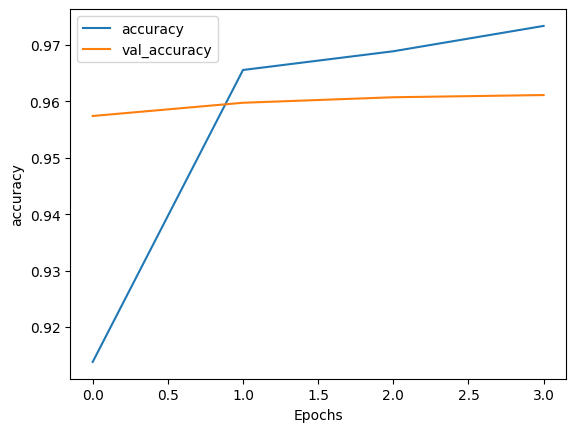

In [ ]:
plot_graphs(model_LSTM_history, 'accuracy')


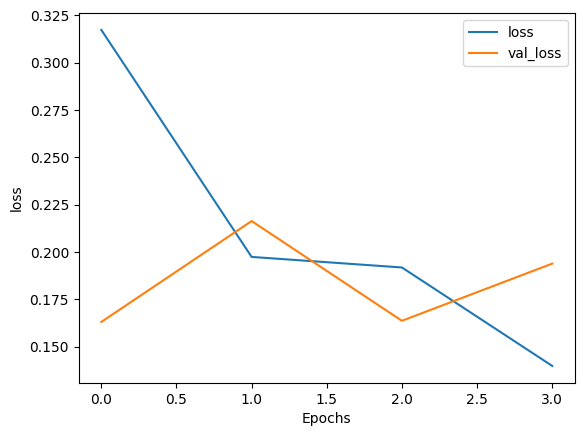

In [ ]:
plot_graphs(model_LSTM_history, 'loss')

In [ ]:
preds = (model_LSTM.predict(X_test) > 0).astype("int32")

200/200 [==============================] - 5s 6ms/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      3127
           1       0.84      0.99      0.91      3273

    accuracy                           0.90      6400
   macro avg       0.92      0.90      0.90      6400
weighted avg       0.92      0.90      0.90      6400

Accuracy : 0.90265625


0.90265625

[[2528  599]
 [  24 3249]]


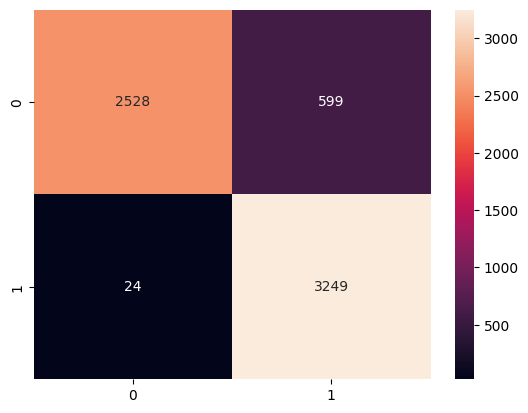

In [ ]:
show_confusion_matrix(Y_test, preds)

In [ ]:
model_LSTM.save("/content/drive/MyDrive/model_LSTM_finalclickbaitchecker")

**GRU Model**

In [ ]:
# Define a GRU cell
gru_cell = tf.keras.layers.GRUCell(units=24)

# Create an RNN layer using the GRU cell
rnn_layer = tf.keras.layers.RNN(gru_cell)

model_GRU = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=24,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(rnn_layer),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1)

])

# compile the model
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, None, 24)          24000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 48)               7200      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                1176      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 32,401
Trainable params: 32,401
Non-trai

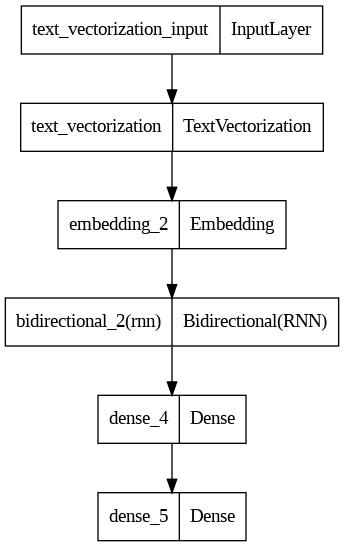

In [ ]:
tf.keras.utils.plot_model(model_GRU)

In [ ]:
# fit the model
model_GRU_history=model_GRU.fit(
    X_train,
    Y_train,
    epochs=10,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, reduce_lr],
    class_weight = class_weights
)

Epoch 1/10
640/640 [==============================] - 21s 27ms/step - loss: 0.2886 - accuracy: 0.9203 - val_loss: 0.1849 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 2/10
640/640 [==============================] - 17s 27ms/step - loss: 0.1905 - accuracy: 0.9668 - val_loss: 0.2585 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 3/10
640/640 [==============================] - ETA: 0s - loss: 0.1808 - accuracy: 0.9696
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
640/640 [==============================] - 18s 27ms/step - loss: 0.1808 - accuracy: 0.9696 - val_loss: 0.2312 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 4/10
640/640 [==============================] - 18s 28ms/step - loss: 0.1632 - accuracy: 0.9755 - val_loss: 0.2682 - val_accuracy: 0.9572 - lr: 2.5000e-04


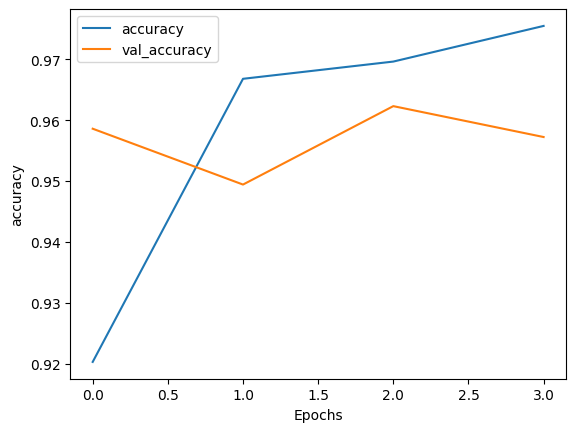

In [ ]:
plot_graphs(model_GRU_history, 'accuracy')


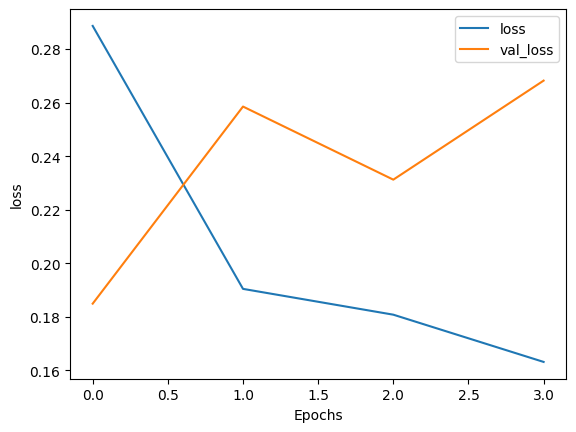

In [ ]:
plot_graphs(model_GRU_history, 'loss')

In [ ]:
preds = (model_GRU.predict(X_test) > 0).astype("int32")

200/200 [==============================] - 1s 5ms/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.82      0.89      3127
           1       0.85      0.99      0.92      3273

    accuracy                           0.91      6400
   macro avg       0.92      0.90      0.90      6400
weighted avg       0.92      0.91      0.91      6400

Accuracy : 0.9059375


0.9059375

[[2553  574]
 [  28 3245]]


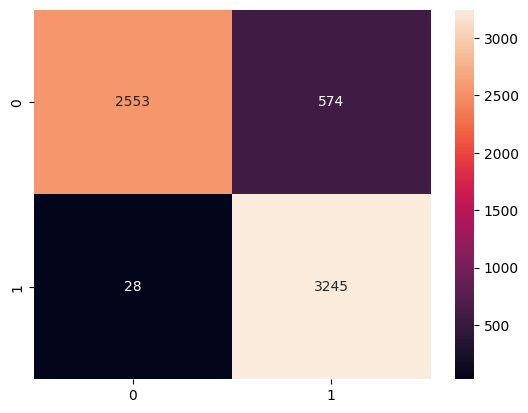

In [ ]:
show_confusion_matrix(Y_test, preds)

In [ ]:
model_GRU.save("/content/drive/MyDrive/model_GRU_finalclickbaitchecker")

**Hugging Face Transformer: Distilbert**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
X=dataset_2['headline'].values
Y=dataset_2['clickbait'].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [ ]:
data = {'headline': X_train, 'label': Y_train}
df_train = pd.DataFrame(data)

data_2={'headline': X_val, 'label': Y_val}
df_val = pd.DataFrame(data_2)

data_3={'headline': X_test, 'label': Y_test}
df_test = pd.DataFrame(data_3)

In [ ]:
from datasets import Dataset

hf_train=Dataset.from_pandas(df_train)
hf_val=Dataset.from_pandas(df_val)
hf_test=Dataset.from_pandas(df_test)

In [ ]:
hf_dataset=Dataset.from_pandas(dataset_2)

def tokenize_function(examples):
    return tokenizer(examples['headline'], truncation=True)

tokenized_dataset_train = hf_train.map(tokenize_function, batched=True)
tokenized_dataset_val = hf_val.map(tokenize_function, batched=True)
tokenized_dataset_test = hf_test.map(tokenize_function, batched=True)



Map:   0%|          | 0/20480 [00:00<?, ? examples/s]

Map:   0%|          | 0/5120 [00:00<?, ? examples/s]

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
id2label = {0: "not_clickbait", 1: "clickbait"}
label2id = {"not_clickbait": 0, "clickbait": 1}


In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
tokenized_dataset_train

Dataset({
    features: ['headline', 'label', 'input_ids', 'attention_mask'],
    num_rows: 20480
})

In [ ]:
# Prepare TF datasets
tf_train_set = model.prepare_tf_dataset(
    tokenized_dataset_train,
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_dataset_val,
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_dataset_test,
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)


You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
print("Columns in Tokenized Train Dataset:", tokenized_dataset_train.column_names)
print("Columns in Tokenized Validation Dataset:", tokenized_dataset_val.column_names)
print("Columns in Tokenized Test Dataset:", tokenized_dataset_test.column_names)


Columns in Tokenized Train Dataset: ['headline', 'label', 'input_ids', 'attention_mask']
Columns in Tokenized Validation Dataset: ['headline', 'label', 'input_ids', 'attention_mask']
Columns in Tokenized Test Dataset: ['headline', 'label', 'input_ids', 'attention_mask']


In [ ]:
tf_train_set

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(16, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(16, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(16,), dtype=tf.int64, name=None))>

In [ ]:
from transformers import create_optimizer

batch_size = 16
num_epochs = 10
batches_per_epoch = len(np.array(X_train)) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
model.compile(optimizer=optimizer, metrics = ['accuracy'])

# summarize the model
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


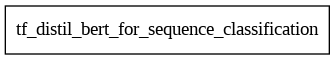

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
from transformers.keras_callbacks import KerasMetricCallback


metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

In [ ]:
callbacks=[metric_callback]

In [ ]:
# fit the model
model_Hugging_history=model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=5, callbacks=callbacks, class_weight=class_weights)

Epoch 1/3
1280/1280 [==============================] - 7060s 5s/step - loss: 0.3711 - accuracy: 0.8689 - val_loss: 0.3061 - val_accuracy: 0.8689
Epoch 2/3
1280/1280 [==============================] - 7037s 5s/step - loss: 0.2885 - accuracy: 0.8904 - val_loss: 0.2667 - val_accuracy: 0.8904
Epoch 3/3
1280/1280 [==============================] - 7091s 6s/step - loss: 0.2458 - accuracy: 0.8994 - val_loss: 0.2464 - val_accuracy: 0.8994


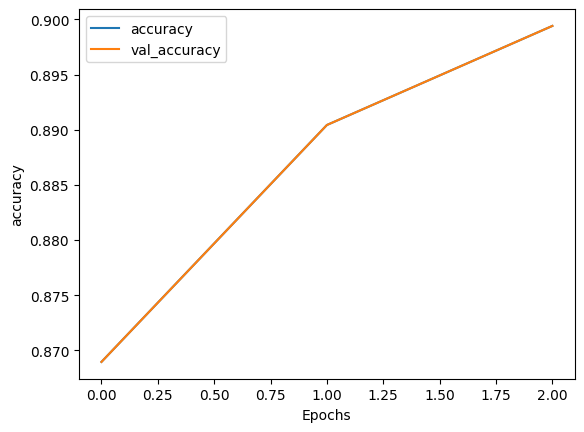

In [ ]:
plot_graphs(model_Hugging_history, 'accuracy')


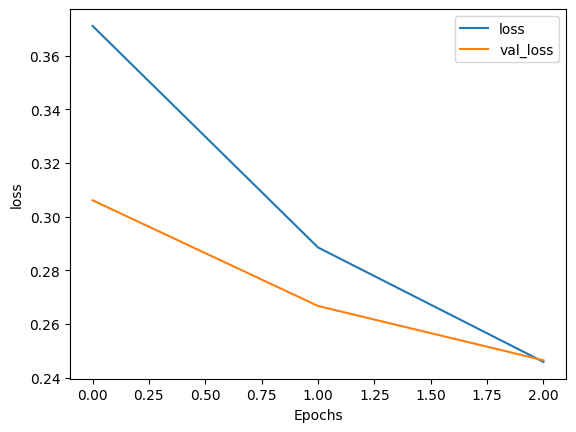

In [ ]:
plot_graphs(model_Hugging_history, 'loss')

In [ ]:
# Get the model's predictions
predictions = model.predict(tf_test_set)

# Extract the predicted probabilities or logits for the positive class
positive_class_probabilities = predictions.logits[:, 1]  # Assuming class 1 is clickbait

# Define a threshold (e.g., 0.5) to determine the class label
threshold = 0.5

# Calculate the predicted class labels based on the threshold
preds = (positive_class_probabilities > threshold).astype("int64")

400/400 [==============================] - 531s 1s/step


In [ ]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3127
           1       0.96      0.81      0.88      3273

    accuracy                           0.88      6400
   macro avg       0.89      0.88      0.88      6400
weighted avg       0.89      0.88      0.88      6400

Accuracy : 0.88265625


0.88265625

[[3011  116]
 [ 635 2638]]


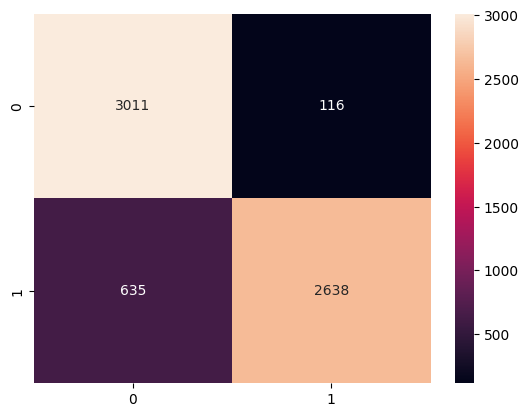

In [ ]:
show_confusion_matrix(Y_test, preds)

In [ ]:
model.save("/content/drive/MyDrive/model_Hugging_finalclickbaitchecker")